![Lego](https://www.lego.com/cdn/cs/set/assets/blt43d71bdb7a2ee793/pick-a-brick-banner-background-large.jpg?width=1320&height=200&dpr=1)

# Lego - Linear Regression

## Importing Librairies

In [1]:
import pandas as pd
from  datetime import datetime
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from scipy.stats import boxcox

## Data collection

In [2]:
path_data = r"C:/Users/Camille/Documents/Ecole/Ironhack/Week 6/Group_project/lego/data-tidy"

lego2 = pd.read_csv(path_data+"/legosets.csv")

In [3]:
lego2.Item_Number.nunique()

5854

In [4]:
lego2.shape

(6172, 14)

In [5]:
lego2.head()

,Item_Number,Name,Year,Theme,Subtheme,Pieces,Minifigures,Image_URL,GBP_MSRP,USD_MSRP,CAD_MSRP,EUR_MSRP,Packaging,Availability
0,10246,Detective's Office,2015,Advanced Models,Modular Buildings,2262.0,6.0,http://images.brickset.com/sets/images/10246-1...,132.99,159.99,199.99,149.99,Box,Retail - limited
1,10247,Ferris Wheel,2015,Advanced Models,Fairground,2464.0,10.0,http://images.brickset.com/sets/images/10247-1...,149.99,199.99,229.99,179.99,Box,Retail - limited
2,10248,Ferrari F40,2015,Advanced Models,Vehicles,1158.0,NaN,http://images.brickset.com/sets/images/10248-1...,69.99,99.99,119.99,89.99,Box,LEGO exclusive
3,10249,Toy Shop,2015,Advanced Models,Winter Village,898.0,NaN,http://images.brickset.com/sets/images/10249-1...,59.99,79.99,NaN,69.99,Box,LEGO exclusive
4,10581,Ducks,2015,Duplo,Forest Animals,13.0,1.0,http://images.brickset.com/sets/images/10581-1...,9.99,9.99,12.99,9.99,Box,Retail


## Data cleaning

### Checking missing values

In [8]:
missing = lego2.isna().sum()

In [9]:
missing[missing > 0]

Subtheme       2206
Pieces          112
Minifigures    2672
GBP_MSRP       1980
USD_MSRP        355
CAD_MSRP       4190
EUR_MSRP       4399
dtype: int64

### Checking MSRP and change rate: 

In [217]:
#taux = lego2[(lego2.USD_MSRP.notna()) & (lego2.GBP_MSRP.notna()) & (lego2.GBP_MSRP > 0) & (lego2.USD_MSRP > 0)]

In [218]:
#taux["tc"] = taux.apply(lambda row : float(row["GBP_MSRP"])/float(row["USD_MSRP"]), axis=1)

In [219]:
#taux.head()

In [220]:
#taux_year = lego2[(lego2.USD_MSRP.isna()) & ( (lego2.GBP_MSRP.notna()) | (lego2.CAD_MSRP.notna()) | (lego2.EUR_MSRP.notna()))]

In [221]:
#taux_year[(taux_year.EUR_MSRP > 0) | (taux_year.CAD_MSRP > 0) | (taux_year.GBP_MSRP > 0)]

In [222]:
#taux_year.Year.nunique()

In [10]:
# drop price columns
lego2.drop("GBP_MSRP", axis=1, inplace=True)
lego2.drop("CAD_MSRP", axis=1, inplace=True)
lego2.drop("EUR_MSRP", axis=1, inplace=True)

In [11]:
# drop nan rows in USD
lego2 = lego2[lego2.USD_MSRP.notna()]

In [12]:
# drop 0 rows in USD
lego2 = lego2[lego2.USD_MSRP > 0]

### Checking Pieces

In [13]:
# drop 0 rows in pieces
lego2 = lego2[lego2.Pieces > 0]

In [14]:
lego2.isna().sum()

Item_Number        0
Name               0
Year               0
Theme              0
Subtheme        1998
Pieces             0
Minifigures     2255
Image_URL          0
USD_MSRP           0
Packaging          0
Availability       0
dtype: int64

In [15]:
# drop nan rows in piece
lego2 = lego2[lego2.Pieces.notna()]

In [16]:
lego2.isna().sum()

Item_Number        0
Name               0
Year               0
Theme              0
Subtheme        1998
Pieces             0
Minifigures     2255
Image_URL          0
USD_MSRP           0
Packaging          0
Availability       0
dtype: int64

### Checking Minifigures

In [17]:
# drop nan for minifigures rows
lego2 = lego2[lego2.Minifigures.notna()]

In [18]:
lego2.isna().sum()

Item_Number       0
Name              0
Year              0
Theme             0
Subtheme        991
Pieces            0
Minifigures       0
Image_URL         0
USD_MSRP          0
Packaging         0
Availability      0
dtype: int64

### Checking duplicate rows

In [201]:
duplicates=lego2.loc[lego2.Item_Number.duplicated()==True]
duplicates.head()

AttributeError: 'DataFrame' object has no attribute 'Item_Number'

In [20]:
duplicates.loc[duplicates.Name.duplicated()==True]

,Item_Number,Name,Year,Theme,Subtheme,Pieces,Minifigures,Image_URL,USD_MSRP,Packaging,Availability


In [21]:
duplicates.groupby("Item_Number").mean()

,Year,Pieces,Minifigures,USD_MSRP
Item_Number,,,,
6075,1981,767.000000,14.0000,48.00
6077,1981,48.000000,6.0000,5.00
6083,1981,211.000000,6.0000,16.00
71000,2013,6.533333,1.0000,2.99
71001,2013,6.500000,1.0000,2.99
71002,2013,6.933333,1.0000,2.99
71004,2014,5.800000,1.0000,2.99
71005,2014,5.533333,1.0000,3.99
71007,2014,7.333333,1.0000,3.99


### Dropping columns

In [22]:
# drop itemnumber, name 
lego2.drop("Subtheme", axis=1, inplace=True)
lego2.drop("Image_URL", axis=1, inplace=True)

In [23]:
lego2.head()

,Item_Number,Name,Year,Theme,Pieces,Minifigures,USD_MSRP,Packaging,Availability
0,10246,Detective's Office,2015,Advanced Models,2262.0,6.0,159.99,Box,Retail - limited
1,10247,Ferris Wheel,2015,Advanced Models,2464.0,10.0,199.99,Box,Retail - limited
4,10581,Ducks,2015,Duplo,13.0,1.0,9.99,Box,Retail
5,10582,Animals,2015,Duplo,39.0,2.0,19.99,Box,Retail
6,10583,Fishing Trip,2015,Duplo,32.0,2.0,24.99,Box,Retail


In [25]:
lego2.shape

(3346, 9)

### Cleaning age

In [26]:
# create age column
lego2["age"] = datetime.now().year-lego2.Year

In [27]:
# drop year column
lego2.drop("Year", axis=1, inplace=True)

### Cleaning Themes

In [28]:
# regroup Themes
lst_theme = list(lego2.Theme.value_counts().head(10).index)
lst_theme

['Duplo',
 'Star Wars',
 'Town',
 'City',
 'Collectable Minifigures',
 'Castle',
 'Space',
 'Ninjago',
 'Friends',
 'Legends of Chima']

In [29]:
lego2.Theme = lego2.apply(lambda row : "Other" if row["Theme"] not in lst_theme else row["Theme"], axis=1)

In [30]:
lego2.Theme.value_counts()

Other                      1352
Duplo                       299
Star Wars                   290
Town                        283
City                        262
Collectable Minifigures     255
Castle                      173
Space                       153
Ninjago                     111
Friends                      87
Legends of Chima             81
Name: Theme, dtype: int64

### Dropping item and Name

In [60]:
lego2.drop("Item_Number", axis=1, inplace=True)
lego2.drop("Name", axis=1, inplace=True)

### Creating dummies

In [61]:
dummies_list = ["Theme","Availability","Packaging"]

In [62]:
# creating dummies for Theme, Availability, Packaging
lego3 = pd.get_dummies(data=lego2, columns=dummies_list, drop_first=True)

In [63]:
lego3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3346 entries, 0 to 6070
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Pieces                              3346 non-null   float64
 1   Minifigures                         3346 non-null   float64
 2   USD_MSRP                            3346 non-null   float64
 3   age                                 3346 non-null   int64  
 4   Outliers_Price                      3346 non-null   int64  
 5   Outliers_Piece                      3346 non-null   int64  
 6   Theme_City                          3346 non-null   uint8  
 7   Theme_Collectable Minifigures       3346 non-null   uint8  
 8   Theme_Duplo                         3346 non-null   uint8  
 9   Theme_Friends                       3346 non-null   uint8  
 10  Theme_Legends of Chima              3346 non-null   uint8  
 11  Theme_Ninjago                       3346 no

In [64]:
lego3.rename(columns = {"USD_MSRP":"Price_USD"}, inplace=True)

### Transforming Numeric data into Normal Distribution

Text(0.5, 0, 'Number of pieces')

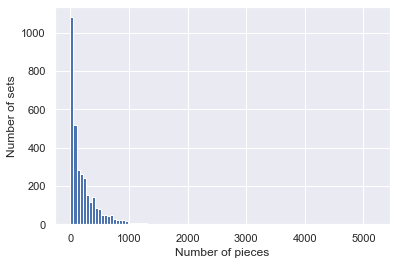

In [273]:
lego3.Pieces.hist(bins=100)
plt.ylabel("Number of sets")
plt.xlabel("Number of pieces")

Text(0.5, 0, 'Age')

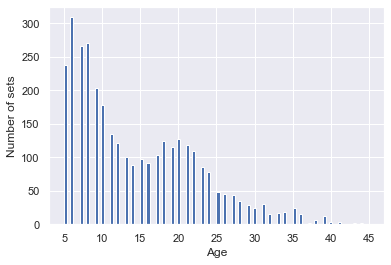

In [274]:
lego3.age.hist(bins=100)
plt.ylabel("Number of sets")
plt.xlabel("Age")

Text(0.5, 0, 'Price')

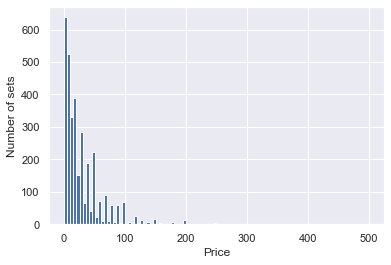

In [275]:
lego3.Price_USD.hist(bins=100)
plt.ylabel("Number of sets")
plt.xlabel("Price")

Text(0.5, 0, 'Number of Minifigures')

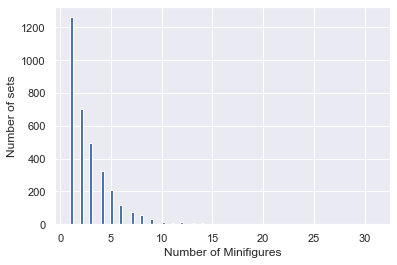

In [277]:
lego3.Minifigures.hist(bins=100)
plt.ylabel("Number of sets")
plt.xlabel("Number of Minifigures")

None of them are normally distributed

In [268]:
# transform numeric columns to normal distribution
lego3["age2"] = boxcox(lego3.age, 0)

In [264]:
#lego3["age2"] = boxcox(lego3.age,2)

In [266]:
#lego3["age2"] = boxcox(lego3.age2,0)

Text(0.5, 0, 'Age')

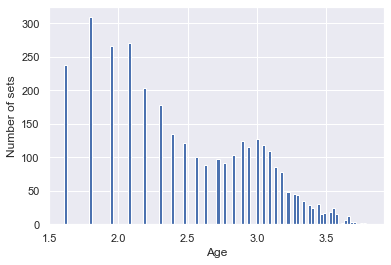

In [278]:
lego3.age2.hist(bins=100)
plt.ylabel("Number of sets")
plt.xlabel("Age")

In [70]:
lego3["Price_USD2"] = boxcox(lego3.Price_USD, 0)

Text(0.5, 0, 'Price')

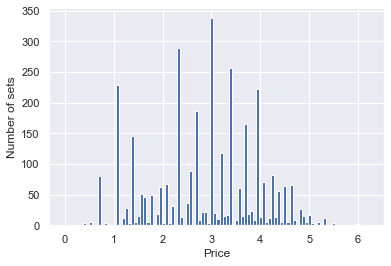

In [280]:
lego3.Price_USD2.hist(bins=100)
plt.ylabel("Number of sets")
plt.xlabel("Price")

In [71]:
lego3["Pieces2"] = boxcox(lego3.Pieces, 0)

In [345]:
boxcox(lego3.age,)

(array([1.51901894, 1.51901894, 1.51901894, ..., 3.30912981, 3.30912981,
        3.32619296]),
 -0.07255755177402415)

In [346]:
lego3["age2"], lambda_age = boxcox(lego3.age)

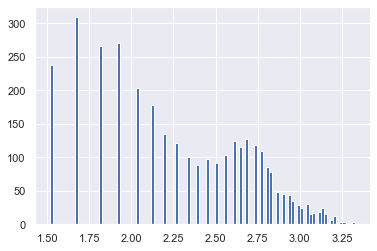

In [348]:
lego3.age2.hist(bins=100)

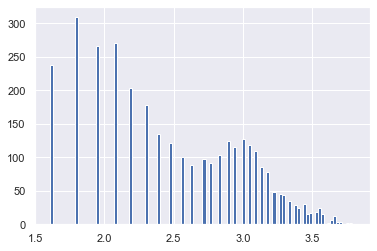

In [342]:
lego3.age2.hist(bins=100)

Text(0.5, 0, 'Number of pieces')

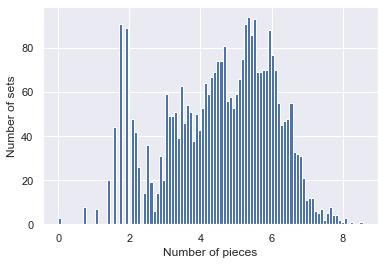

In [279]:
lego3.Pieces2.hist(bins=100)
plt.ylabel("Number of sets")
plt.xlabel("Number of pieces")

In [72]:
lego3["Minifigures2"] = boxcox(lego3.Minifigures, 0)

In [73]:
lego3.head()

,Pieces,Minifigures,Price_USD,age,Outliers_Price,Outliers_Piece,Theme_City,Theme_Collectable Minifigures,Theme_Duplo,Theme_Friends,...,Packaging_Foil pack,Packaging_Not specified,Packaging_Other,Packaging_Plastic box,Packaging_Polybag,Packaging_Tub,age2,Price_USD2,Pieces2,Minifigures2
0,2262.0,6.0,159.99,5,1,1,0,0,0,0,...,0,0,0,0,0,0,1.609438,5.075111,7.724005,1.791759
1,2464.0,10.0,199.99,5,1,1,0,0,0,0,...,0,0,0,0,0,0,1.609438,5.298267,7.809541,2.302585
4,13.0,1.0,9.99,5,0,1,0,0,1,0,...,0,0,0,0,0,0,1.609438,2.301585,2.564949,0.000000
5,39.0,2.0,19.99,5,0,0,0,0,1,0,...,0,0,0,0,0,0,1.609438,2.995232,3.663562,0.693147
6,32.0,2.0,24.99,5,0,1,0,0,1,0,...,0,0,0,0,0,0,1.609438,3.218476,3.465736,0.693147


### Checking price and pieces duplicates

In [74]:
lego3.loc[lego3.Price_USD.duplicated()==True]

,Pieces,Minifigures,Price_USD,age,Outliers_Price,Outliers_Piece,Theme_City,Theme_Collectable Minifigures,Theme_Duplo,Theme_Friends,...,Packaging_Foil pack,Packaging_Not specified,Packaging_Other,Packaging_Plastic box,Packaging_Polybag,Packaging_Tub,age2,Price_USD2,Pieces2,Minifigures2
8,13.0,2.0,9.99,5,0,1,0,0,1,0,...,0,0,0,0,0,0,1.609438,2.301585,2.564949,0.693147
10,52.0,3.0,19.99,5,0,0,0,0,1,0,...,0,0,0,0,0,0,1.609438,2.995232,3.951244,1.098612
11,13.0,1.0,14.99,5,0,1,0,0,1,0,...,0,0,0,0,0,0,1.609438,2.707383,2.564949,0.000000
16,38.0,1.0,24.99,5,0,0,0,0,1,0,...,0,0,0,0,0,0,1.609438,3.218476,3.637586,0.000000
24,17.0,1.0,14.99,5,0,1,0,0,1,0,...,0,0,0,0,0,0,1.609438,2.707383,2.833213,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6033,123.0,2.0,3.00,41,1,0,0,0,0,0,...,0,1,0,0,0,0,3.713572,1.098612,4.812184,0.693147
6038,170.0,2.0,10.00,42,0,0,0,0,0,0,...,0,1,0,0,0,0,3.737670,2.302585,5.135798,0.693147
6046,467.0,3.0,40.00,43,1,1,0,0,0,0,...,0,1,0,0,0,0,3.761200,3.688879,6.146329,1.098612
6050,202.0,7.0,15.00,44,0,0,0,0,0,0,...,0,1,0,0,0,0,3.784190,2.708050,5.308268,1.945910


In [75]:
lego3.loc[lego3.Price_USD.duplicated()==True].groupby("Price_USD").mean()

,Pieces,Minifigures,age,Outliers_Price,Outliers_Piece,Theme_City,Theme_Collectable Minifigures,Theme_Duplo,Theme_Friends,Theme_Legends of Chima,...,Packaging_Foil pack,Packaging_Not specified,Packaging_Other,Packaging_Plastic box,Packaging_Polybag,Packaging_Tub,age2,Price_USD2,Pieces2,Minifigures2
Price_USD,,,,,,,,,,,,,,,,,,,,,
1.50,2.000000,1.000000,38.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,3.637586,0.405465,0.693147,0.000000
1.70,24.200000,1.000000,21.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,3.044522,0.530628,3.151964,0.000000
1.99,7.129032,1.000000,10.000000,1.0,1.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,2.302585,0.688135,1.949471,0.000000
2.00,22.595745,1.000000,22.872340,1.0,0.957447,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.021277,0.0,0.0,0.425532,0.0,3.123703,0.693147,3.092435,0.000000
2.25,9.333333,1.000000,35.000000,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.000000,0.0,3.555348,0.810930,2.170086,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159.99,1639.666667,5.666667,7.333333,1.0,1.000000,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,1.978298,5.075111,7.307921,1.691725
179.99,1522.333333,6.333333,9.333333,1.0,1.000000,0.333333,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,2.228204,5.192901,7.260530,1.791759
199.99,1894.181818,5.000000,5.909091,1.0,1.000000,0.181818,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,1.763066,5.298267,7.492705,1.355684


In [76]:
lego3.loc[lego3.Pieces.duplicated()==True].groupby("Pieces").mean()

,Minifigures,Price_USD,age,Outliers_Price,Outliers_Piece,Theme_City,Theme_Collectable Minifigures,Theme_Duplo,Theme_Friends,Theme_Legends of Chima,...,Packaging_Foil pack,Packaging_Not specified,Packaging_Other,Packaging_Plastic box,Packaging_Polybag,Packaging_Tub,age2,Price_USD2,Pieces2,Minifigures2
Pieces,,,,,,,,,,,,,,,,,,,,,
1.0,1.000000,6.500000,19.000000,1.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.0,2.943052,1.844440,0.000000,0.000000
2.0,1.142857,4.000000,25.571429,0.857143,1.0,0.0,0.000000,0.571429,0.000000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.0,3.194617,1.171587,0.693147,0.099021
3.0,2.000000,21.583333,25.500000,0.666667,1.0,0.0,0.000000,0.500000,0.000000,0.0,...,0.000000,0.833333,0.0,0.000000,0.000000,0.0,3.195359,2.463907,1.098612,0.451342
4.0,1.263158,10.368947,15.315789,0.842105,1.0,0.0,0.105263,0.578947,0.000000,0.0,...,0.052632,0.842105,0.0,0.052632,0.052632,0.0,2.631753,1.808719,1.386294,0.167266
5.0,1.627907,8.062326,11.000000,0.860465,1.0,0.0,0.604651,0.093023,0.023256,0.0,...,0.534884,0.232558,0.0,0.069767,0.139535,0.0,2.257443,1.619943,1.609438,0.259442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929.0,10.000000,79.990000,12.000000,1.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.484907,4.381902,6.834109,2.302585
933.0,8.000000,99.990000,10.000000,1.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,1.000000,0.0,0.000000,0.000000,0.0,2.302585,4.605070,6.838405,2.079442
953.0,7.000000,89.990000,12.000000,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.484907,4.499699,6.859615,1.945910


In [77]:
lego4 = lego3.drop(["Pieces","Price_USD","age","Minifigures"], axis=1)

### Outliers

#### 1. Prices outliers

In [254]:
Q1_Price= lego4.Price_USD2.quantile(0.25)
Q3_Price = lego4.Price_USD2.quantile(0.75)
IQR_Price = Q3_Price - Q1_Price
IQR_Price

1.609187881178891

In [ ]:
Outlierbottom_Price=Q1_Price-IQR_Price*1.5

In [ ]:
Outliertop_Price=Q3_Price+IQR_Price*1.5

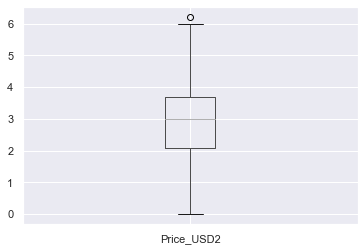

In [203]:
lego4.boxplot(column=['Price_USD2'])

#### 2. Pieces outliers

In [ ]:
#Identifying outliers for Pieces
Q1_Piece = lego4.Pieces2.quantile(0.25)
Q3_Piece = lego4.Pieces2.quantile(0.75)
IQR_Piece = Q3_Piece - Q1_Piece
IQR_Piece

In [ ]:
Outlierbottom_Piece=Q1_Piece-IQR_Piece*1.5

In [ ]:
Outliertop_Piece=Q3_Piece+IQR_Piece*1.5

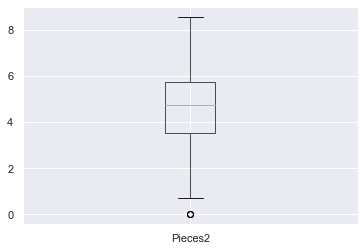

In [204]:
lego4.boxplot(column=['Pieces2'])

#### 3. Minifigures outliers

In [250]:
#Identifying outliers for Pieces
Q1_Mini = lego4.Minifigures2.quantile(0.25)
Q3_Mini = lego4.Minifigures2.quantile(0.75)
IQR_Mini = Q3_Mini - Q1_Mini
IQR_Mini

1.3862943611198906

In [251]:
Outlierbottom_Mini=Q1_Mini-IQR_Mini*1.5
Outlierbottom_Mini

-2.0794415416798357

In [252]:
Outliertop_Mini=Q3_Mini+IQR_Mini*1.5
Outliertop_Mini

3.465735902799726

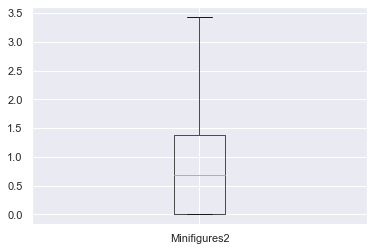

In [206]:
lego4.boxplot(column=['Minifigures2'])

In [210]:
lego4.loc[lego4.Price_USD2>Outliertop_Mini]

,Outliers_Price,Outliers_Piece,Theme_City,Theme_Collectable Minifigures,Theme_Duplo,Theme_Friends,Theme_Legends of Chima,Theme_Ninjago,Theme_Other,Theme_Space,...,Packaging_Foil pack,Packaging_Not specified,Packaging_Other,Packaging_Plastic box,Packaging_Polybag,Packaging_Tub,age2,Price_USD2,Pieces2,Minifigures2
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1.609438,5.075111,7.724005,1.791759
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1.609438,5.298267,7.809541,2.302585
127,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1.609438,4.867458,7.347300,1.609438
204,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.609438,4.787408,6.373320,1.609438
216,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.609438,4.787408,6.575076,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3.295837,4.840242,6.815640,2.197225
5700,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3.367296,5.003946,6.664409,2.397895
5701,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3.367296,4.787492,6.165418,1.098612
5755,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3.401197,4.941642,6.642487,2.197225


### Creating booleans columns

In [211]:
lego4["Outliers_Price"]=lego4.apply(lambda row : 0 if Outlierbottom_Price<row.Price_USD2<Outliertop_Price  else 1, axis=1)
lego4["Outliers_Piece"]=lego4.apply(lambda row : 0 if Outlierbottom_Piece<row.Pieces2<Outliertop_Piece  else 1, axis=1)
lego4["Outliers_Minifigures"]=lego4.apply(lambda row : 0 if Outlierbottom_Mini<row.Minifigures2<Outliertop_Mini  else 1, axis=1)

In [212]:
lego4.head()

,Outliers_Price,Outliers_Piece,Theme_City,Theme_Collectable Minifigures,Theme_Duplo,Theme_Friends,Theme_Legends of Chima,Theme_Ninjago,Theme_Other,Theme_Space,...,Packaging_Not specified,Packaging_Other,Packaging_Plastic box,Packaging_Polybag,Packaging_Tub,age2,Price_USD2,Pieces2,Minifigures2,Outliers_Minifigures
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1.609438,5.075111,7.724005,1.791759,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1.609438,5.298267,7.809541,2.302585,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1.609438,2.301585,2.564949,0.000000,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1.609438,2.995232,3.663562,0.693147,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1.609438,3.218476,3.465736,0.693147,0


### Drop minifigures

In [78]:
lego5 = lego4.drop(["Minifigures2"], axis=1)

In [129]:
lego5.loc[(lego5.Pieces2.duplicated()==True)&(lego5.Price_USD2.duplicated()==True)]

,Theme_City,Theme_Collectable Minifigures,Theme_Duplo,Theme_Friends,Theme_Legends of Chima,Theme_Ninjago,Theme_Other,Theme_Space,Theme_Star Wars,Theme_Town,...,Packaging_Bucket,Packaging_Foil pack,Packaging_Not specified,Packaging_Other,Packaging_Plastic box,Packaging_Polybag,Packaging_Tub,age2,Price_USD2,Pieces2
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.609438,2.301585,2.564949
11,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.609438,2.707383,2.564949
65,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1.609438,1.383791,3.663562
119,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.609438,2.301585,4.465908
124,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.609438,2.301585,4.584967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6030,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3.713572,4.317488,1.098612
6033,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,3.713572,1.098612,4.812184
6038,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,3.737670,2.302585,5.135798
6050,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,3.784190,2.708050,5.308268


### Checking outliers on normalized columns

In [109]:
lego5.describe()

,Outliers_Price,Outliers_Piece,Theme_City,Theme_Collectable Minifigures,Theme_Duplo,Theme_Friends,Theme_Legends of Chima,Theme_Ninjago,Theme_Other,Theme_Space,...,Packaging_Bucket,Packaging_Foil pack,Packaging_Not specified,Packaging_Other,Packaging_Plastic box,Packaging_Polybag,Packaging_Tub,age2,Price_USD2,Pieces2
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,...,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000
mean,0.530484,0.497609,0.078302,0.076210,0.089360,0.026001,0.024208,0.033174,0.404065,0.045726,...,0.003586,0.053497,0.241781,0.004782,0.002092,0.031381,0.004184,2.511196,2.870964,4.578073
std,0.499144,0.500069,0.268687,0.265374,0.285306,0.159163,0.153717,0.179117,0.490783,0.208922,...,0.059788,0.225055,0.428226,0.068996,0.045698,0.174371,0.064559,0.561896,1.098402,1.483384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.609438,-0.010050,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,2.079442,3.526361
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.484907,2.995232,4.736198
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.995732,3.688629,5.709598
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.806662,6.214588,8.555452


In [168]:
lego5.head()

,Outliers_Price,Outliers_Piece,Theme_City,Theme_Collectable Minifigures,Theme_Duplo,Theme_Friends,Theme_Legends of Chima,Theme_Ninjago,Theme_Other,Theme_Space,...,Packaging_Bucket,Packaging_Foil pack,Packaging_Not specified,Packaging_Other,Packaging_Plastic box,Packaging_Polybag,Packaging_Tub,age2,Price_USD2,Pieces2
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1.609438,5.075111,7.724005
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1.609438,5.298267,7.809541
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.609438,2.301585,2.564949
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.609438,2.995232,3.663562
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1.609438,3.218476,3.465736


### Linear regression model 1

In [214]:
# Model
y_test=lego4.Price_USD2
X_test=lego4.drop('Price_USD2',axis=1)

In [215]:
model_test=sm.OLS(y_test,add_constant(X_test))

In [216]:
model_fit_test=model_test.fit()

In [217]:
model_fit_test.summary()

C:\Users\Camille\Anaconda3\Anaconda33\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Camille\Anaconda3\Anaconda33\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Camille\Anaconda3\Anaconda33\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Camille\Anaconda3\Anaconda33\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_USD2   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     662.7
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        13:05:34   Log-Likelihood:                -1806.5
No. Observations:                3346   AIC:                             3675.
Df Residuals:                    3315   BIC:                             3865.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.0140      0.097     -0.145      0.885      -0.203       0.175
Outliers_Price                         0.5143      0.419      1.227      0.220      -0.307       1.336
Outliers_Piece                         1.7390      0.244      7.130      0.000       1.261       2.217
Theme_City                             0.3875      0.044      8.894      0.000       0.302       0.473
Theme_Collectable Minifigures          0.1386      0.061      2.288      0.022       0.020       0.257
Theme_Duplo                            1.3222      0.044     29.883      0.000       1.235       1.409
Theme_Friends                          0.4383      0.059      7.401      0.000       0.322       0.554
Theme_Legends of Chima                 0.1960      0.063      3.096      0.002       0.072       0.320
Theme_Ninjago                          0.3068      0.056      5.483      0.000       0.197       0.416
Theme_Other                            0.3759      0.035     10.833      0.000       0.308       0.444
Theme_Space                            0.1772      0.047      3.770      0.000       0.085       0.269
Theme_Star Wars                        0.2574      0.042      6.114      0.000       0.175       0.340
Theme_Town                             0.1286      0.041      3.102      0.002       0.047       0.210
Availability_Not specified             0.1967      0.154      1.277      0.202      -0.105       0.499
Availability_Promotional              -0.2342      0.067     -3.493      0.000      -0.366      -0.103
Availability_Promotional (Airline)    -0.1630      0.139     -1.170      0.242      -0.436       0.110
Availability_Retail                   -0.1242      0.041     -3.026      0.002      -0.205      -0.044
Availability_Retail - limited         -0.1609      0.047     -3.394      0.001      -0.254      -0.068
Availability_Unknown                  -1.2614      0.419     -3.007      0.003      -2.084      -0.439
Packaging_Box                         -0.5727      0.065     -8.825      0.000      -0.700      -0.445
Packaging_Box with backing card       -0.2134      0.124     -1.727      0.084      -0.456       0.029
Packaging_Bucket                      -0.9995      0.138     -7.247      0.000      -1.270      -0.729
Packaging_Foil pack                   -0.0312      0.081     -0.384      0.701      -0.190       0.128
Packaging_Not specified               -0.5532      0.164     -3.381      0.001      -0.874      -0.232
Packaging_Other                       -0.3713      0.124     -3.004      0.003      -0.614      -0.129
Packaging_Plastic box                  1.7405      0.215      8.083      0.000       1.318       2.163
Packaging_Polybag                     -0.8839      0.078    -11.347      0.000      -1.037      

In [218]:
def func(column,X):
    #drop the column
    if column:
        X=X.drop(column, axis=1)
    # build the model
    model=sm.OLS(y,add_constant(X))
    #fit it
    model_fit=model.fit()
    #display the model
    display(model_fit.summary())
    #return X without the column
    return X

In [40]:
["Packaging_Foil pack","age2","Availability_Promotional (Airline)","Outliers_Price","Availability_Not specified","Packaging_Box with backing card"]

['age2',
 'Packaging_Foil pack',
 'Availability_Promotional (Airline)',
 'Availability_Not specified',
 'Packaging_Box with backing card']

In [229]:
X_test=func("Packaging_Box with backing card",X_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_USD2   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     827.4
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        13:12:16   Log-Likelihood:                -1810.7
No. Observations:                3346   AIC:                             3671.
Df Residuals:                    3321   BIC:                             3824.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.0269      0.067     -0.403      0.687      -0.158       0.104
Outliers_Piece                    1.7380      0.244      7.127      0.000       1.260       2.216
Theme_City                        0.3818      0.042      9.143      0.000       0.300       0.464
Theme_Collectable Minifigures     0.1350      0.052      2.619      0.009       0.034       0.236
Theme_Duplo                       1.3164      0.042     31.133      0.000       1.234       1.399
Theme_Friends                     0.4310      0.057      7.619      0.000       0.320       0.542
Theme_Legends of Chima            0.1743      0.059      2.979      0.003       0.060       0.289
Theme_Ninjago                     0.2994      0.053      5.689      0.000       0.196       0.403
Theme_Other                       0.3737      0.034     10.942      0.000       0.307       0.441
Theme_Space                       0.1776      0.047      3.777      0.000       0.085       0.270
Theme_Star Wars                   0.2552      0.041      6.232      0.000       0.175       0.336
Theme_Town                        0.1269      0.041      3.096      0.002       0.047       0.207
Availability_Promotional         -0.2362      0.065     -3.621      0.000      -0.364      -0.108
Availability_Retail              -0.1250      0.038     -3.289      0.001      -0.200      -0.051
Availability_Retail - limited    -0.1620      0.045     -3.598      0.000      -0.250      -0.074
Availability_Unknown             -1.2593      0.419     -3.004      0.003      -2.081      -0.437
Packaging_Box                    -0.5355      0.042    -12.739      0.000      -0.618      -0.453
Packaging_Bucket                 -0.9598      0.128     -7.501      0.000      -1.211      -0.709
Packaging_Not specified          -0.3187      0.052     -6.132      0.000      -0.421      -0.217
Packaging_Other                  -0.3397      0.112     -3.024      0.003      -0.560      -0.119
Packaging_Plastic box             1.9417      0.169     11.481      0.000       1.610       2.273
Packaging_Polybag                -0.8435      0.062    -13.533      0.000      -0.966      -0.721
Packaging_Tub                    -0.6079      0.120     -5.057      0.000      -0.844      -0.372
Pieces2                           0.6124      0.009     71.070      0.000       0.595       0.629
Minifigures2                      0.3431      0.014     24.244      0.000       0.315       0.371
Outliers_Minifigures                   0          0        nan        nan           0           0
==============================================================================
Omnibus:                      455.185   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2813.135
Skew

Fitting linear regression

R^2: 0.8567243735672524 

Coefficients
-------------------------------------
Intercept: -0.026936739204205473
Outliers_Piece: 1.74
Theme_City: 0.38
Theme_Collectable Minifigures: 0.13
Theme_Duplo: 1.32
Theme_Friends: 0.43
Theme_Legends of Chima: 0.17
Theme_Ninjago: 0.3
Theme_Other: 0.37
Theme_Space: 0.18
Theme_Star Wars: 0.26
Theme_Town: 0.13
Availability_Promotional: -0.24
Availability_Retail: -0.13
Availability_Retail - limited: -0.16
Availability_Unknown: -1.26
Packaging_Box: -0.54
Packaging_Bucket: -0.96
Packaging_Not specified: -0.32
Packaging_Other: -0.34
Packaging_Plastic box: 1.94
Packaging_Polybag: -0.84
Packaging_Tub: -0.61
Pieces2: 0.61
Minifigures2: 0.34
Outliers_Minifigures: 0.0

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


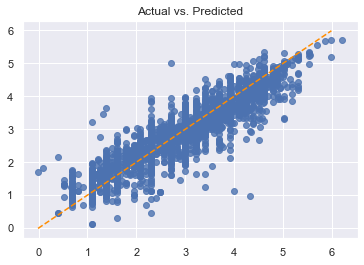

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with Price_USD2


Series([], Name: Price_USD2, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with Price_USD2


Pieces2         0.827721
Minifigures2    0.702525
Name: Price_USD2, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


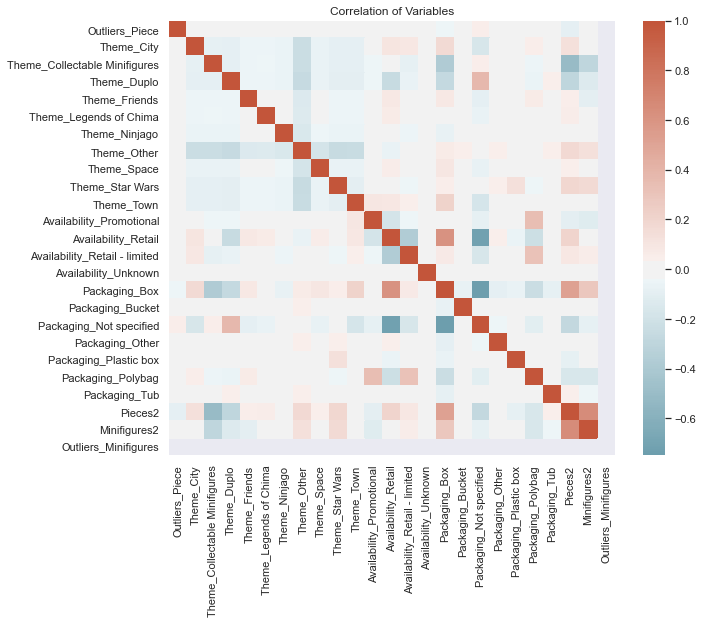

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


C:\Users\Camille\Anaconda3\Anaconda33\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Pieces2: 28.195631543380493
Packaging_Box: 17.31969033582864
Availability_Retail: 12.680254452554289
Theme_Other: 7.423590422054802
Packaging_Not specified: 6.050497099989032
Minifigures2: 4.183598307386092
Availability_Retail - limited: 2.5651509528192813
Theme_Star Wars: 2.538975282133968
Theme_Duplo: 2.4402247821234933
Theme_City: 2.3875178459059376
Theme_Town: 2.351759239335243
Theme_Collectable Minifigures: 2.055377442285145
Packaging_Polybag: 1.8868054190136883
Theme_Space: 1.7909334033868853
Theme_Friends: 1.5277901653286194
Theme_Ninjago: 1.5161152016563704
Availability_Promotional: 1.5151966943528405
Theme_Legends of Chima: 1.4221214254362902
Packaging_Tub: 1.1460979991321703
Packaging_Other: 1.1268954454571936
Packaging_Bucket: 1.1111108387432582
Packaging_Plastic box: 1.0536958598405095
Outliers_Piece: 1.0207339866528666
Availability_Unknown: 1.0067329239880423
Outliers_Minifigures: nan

3 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption 

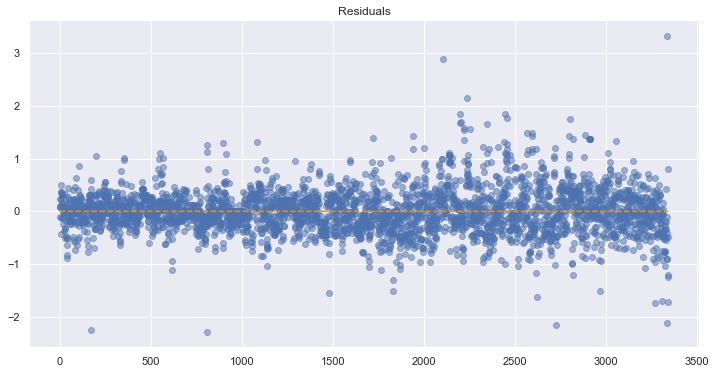

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 760.1675368325959,
 'pvalue for LM': 5.2717287695456e-145,
 'F stats': 40.690902467708206,
 'pvalue for Fstats': 7.275603823163885e-166}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


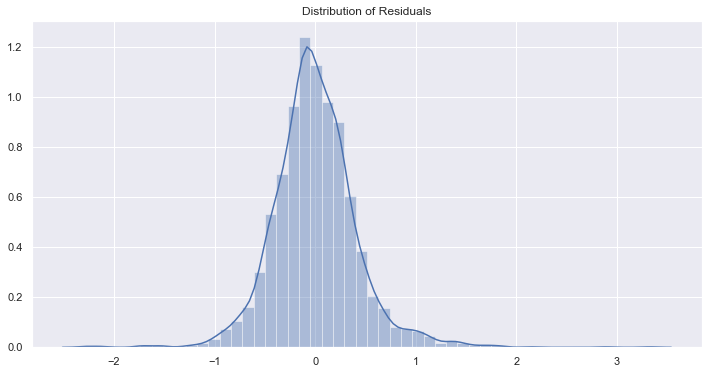


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


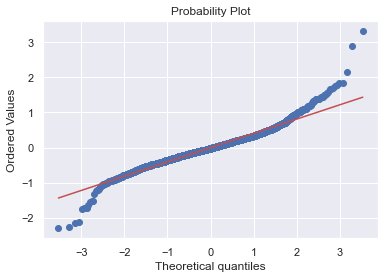


In your dataset you quite fat tails. You have 0.016 potential outliers (53 rows)


{'Satisfied': ['Linearity'],
 'Potentially': ['Multicollinearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Autocorrelation', 'Normality']}

In [230]:
atols(X_test,y_test).run_all()

### Linear regression model 2 - without minifigures

In [174]:
# Test model without column minifigures2
y=lego5.Price_USD2
X=lego5.drop('Price_USD2',axis=1)

model=sm.OLS(y,add_constant(X))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_USD2   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     566.0
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        12:29:10   Log-Likelihood:                -2077.8
No. Observations:                3346   AIC:                             4216.
Df Residuals:                    3316   BIC:                             4399.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.1246      0.105     -1.191      0.234      -0.330       0.080
Outliers_Price                         0.2777      0.454      0.611      0.541      -0.613       1.168
Outliers_Piece                         2.0171      0.264      7.636      0.000       1.499       2.535
Theme_City                             0.2316      0.047      4.957      0.000       0.140       0.323
Theme_Collectable Minifigures          0.0919      0.066      1.400      0.162      -0.037       0.221
Theme_Duplo                            1.2717      0.048     26.536      0.000       1.178       1.366
Theme_Friends                          0.1415      0.063      2.253      0.024       0.018       0.265
Theme_Legends of Chima                 0.0194      0.068      0.285      0.775      -0.114       0.153
Theme_Ninjago                          0.1600      0.060      2.654      0.008       0.042       0.278
Theme_Other                            0.2627      0.037      7.046      0.000       0.190       0.336
Theme_Space                           -0.0054      0.050     -0.108      0.914      -0.104       0.093
Theme_Star Wars                        0.1585      0.045      3.488      0.000       0.069       0.248
Theme_Town                            -0.0023      0.045     -0.052      0.958      -0.090       0.085
Availability_Not specified             0.0479      0.167      0.287      0.774      -0.279       0.375
Availability_Promotional              -0.3620      0.072     -4.995      0.000      -0.504      -0.220
Availability_Promotional (Airline)    -0.2451      0.151     -1.622      0.105      -0.541       0.051
Availability_Retail                   -0.2160      0.044     -4.876      0.000      -0.303      -0.129
Availability_Retail - limited         -0.2246      0.051     -4.375      0.000      -0.325      -0.124
Availability_Unknown                  -1.4700      0.455     -3.233      0.001      -2.362      -0.578
Packaging_Box                         -0.5905      0.070     -8.393      0.000      -0.728      -0.453
Packaging_Box with backing card       -0.3481      0.134     -2.602      0.009      -0.610      -0.086
Packaging_Bucket                      -1.2334      0.149     -8.268      0.000      -1.526      -0.941
Packaging_Foil pack                   -0.0326      0.088     -0.371      0.711      -0.205       0.140
Packaging_Not specified               -0.4773      0.177     -2.690      0.007      -0.825      -0.129
Packaging_Other                       -0.4446      0.134     -3.318      0.001      -0.707      -0.182
Packaging_Plastic box                  2.2215      0.232      9.556      0.000       1.766       2.677
Packaging_Polybag                     -0.9382      0.084    -11.112      0.000      -1.104      

### Cleaning pvalues

In [249]:
["Theme_Town","Theme_Space","Availability_Not specified","Theme_Legends of Chima","Packaging_Foil pack","age2","Outliers_Price","Theme_Collectable Minifigures","Availability_Promotional (Airline)"]

['Theme_Town',
 'Theme_Space',
 'Availability_Not specified',
 'Theme_Legends of Chima',
 'Packaging_Foil pack',
 'age2',
 'Outliers_Price',
 'Theme_Collectable Minifigures',
 'Availability_Promotional (Airline)']

In [183]:
X=func("Availability_Promotional (Airline)",X)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_USD2   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     821.1
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        12:32:29   Log-Likelihood:                -2080.8
No. Observations:                3346   AIC:                             4204.
Df Residuals:                    3325   BIC:                             4332.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0549      0.052     -1.057      0.290      -0.157       0.047
Outliers_Piece                      1.9922      0.263      7.561      0.000       1.476       2.509
Theme_City                          0.2164      0.033      6.584      0.000       0.152       0.281
Theme_Duplo                         1.2444      0.033     37.149      0.000       1.179       1.310
Theme_Friends                       0.1227      0.052      2.381      0.017       0.022       0.224
Theme_Ninjago                       0.1325      0.046      2.872      0.004       0.042       0.223
Theme_Other                         0.2508      0.021     12.002      0.000       0.210       0.292
Theme_Star Wars                     0.1470      0.032      4.531      0.000       0.083       0.211
Availability_Promotional           -0.3523      0.070     -5.001      0.000      -0.490      -0.214
Availability_Retail                -0.1994      0.041     -4.874      0.000      -0.280      -0.119
Availability_Retail - limited      -0.2087      0.049     -4.284      0.000      -0.304      -0.113
Availability_Unknown               -1.4513      0.454     -3.196      0.001      -2.342      -0.561
Packaging_Box                      -0.6102      0.038    -16.083      0.000      -0.685      -0.536
Packaging_Box with backing card    -0.3705      0.121     -3.051      0.002      -0.609      -0.132
Packaging_Bucket                   -1.2445      0.136     -9.122      0.000      -1.512      -0.977
Packaging_Not specified            -0.4219      0.053     -7.977      0.000      -0.526      -0.318
Packaging_Other                    -0.4740      0.119     -3.980      0.000      -0.707      -0.240
Packaging_Plastic box               2.2445      0.180     12.478      0.000       1.892       2.597
Packaging_Polybag                  -0.9616      0.062    -15.562      0.000      -1.083      -0.840
Packaging_Tub                      -0.9542      0.128     -7.462      0.000      -1.205      -0.704
Pieces2                             0.7318      0.007    102.953      0.000       0.718       0.746
==============================================================================
Omnibus:                      575.167   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3719.443
Skew:                           0.654   Prob(JB):                         0.00
Kurtosis:                       7.997   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [295]:
#y_pred=model_fit.predict(add_constant(X))
#plt.scatter(y,y_pred)

## Checking assumptions

Fitting linear regression

R^2: 0.8316186581894514 

Coefficients
-------------------------------------
Intercept: -0.05493592034075334
Outliers_Piece: 1.99
Theme_City: 0.22
Theme_Duplo: 1.24
Theme_Friends: 0.12
Theme_Ninjago: 0.13
Theme_Other: 0.25
Theme_Star Wars: 0.15
Availability_Promotional: -0.35
Availability_Retail: -0.2
Availability_Retail - limited: -0.21
Availability_Unknown: -1.45
Packaging_Box: -0.61
Packaging_Box with backing card: -0.37
Packaging_Bucket: -1.24
Packaging_Not specified: -0.42
Packaging_Other: -0.47
Packaging_Plastic box: 2.24
Packaging_Polybag: -0.96
Packaging_Tub: -0.95
Pieces2: 0.73

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


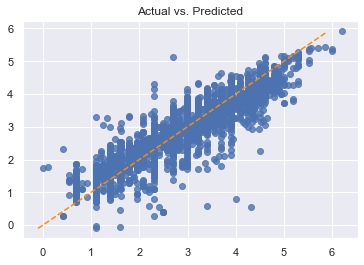

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with Price_USD2


Series([], Name: Price_USD2, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with Price_USD2


Pieces2    0.827721
Name: Price_USD2, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


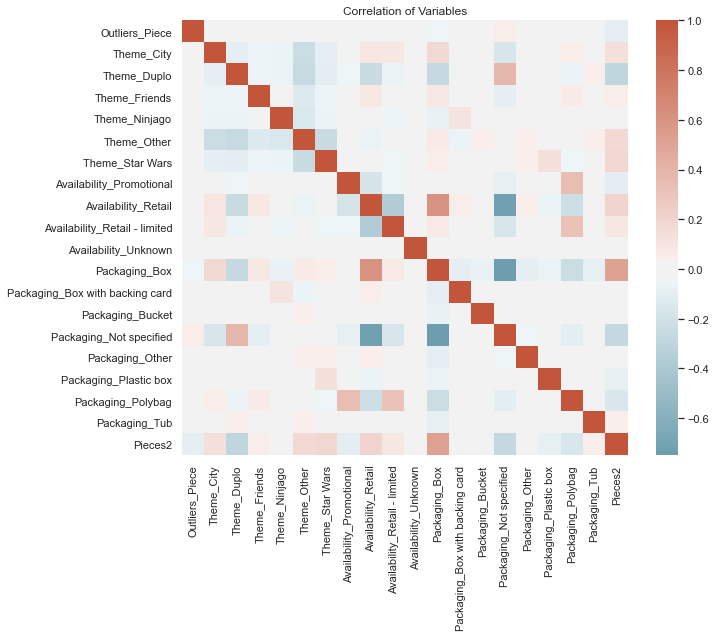

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Pieces2: 16.548876730386088
Packaging_Box: 14.093998827584944
Availability_Retail: 7.308210723060135
Packaging_Not specified: 4.465775423542478
Theme_Other: 2.8871533403932728
Availability_Retail - limited: 2.0671999873460187
Packaging_Polybag: 1.7636925224790965
Theme_Duplo: 1.6288663998811876
Theme_Star Wars: 1.4913333680451424
Theme_City: 1.3828690403049482
Availability_Promotional: 1.379030351986375
Theme_Ninjago: 1.1535280316267835
Theme_Friends: 1.129451298109848
Packaging_Tub: 1.1175522806745666
Packaging_Other: 1.1030462771540241
Packaging_Bucket: 1.0894832889344472
Packaging_Box with backing card: 1.0761415197842543
Packaging_Plastic box: 1.0283992257956338
Outliers_Piece: 1.0172547799966072
Availability_Unknown: 1.0037359377704531

2 cases of possible multicollinearity
0 cases of definite multicol

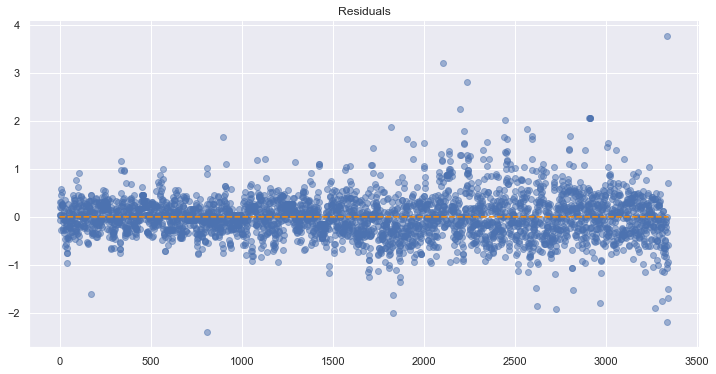

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 669.8016556608989,
 'pvalue for LM': 8.92737755942254e-130,
 'F stats': 41.62173389428472,
 'pvalue for Fstats': 6.895095127052424e-145}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


C:\Users\Camille\Anaconda3\Anaconda33\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


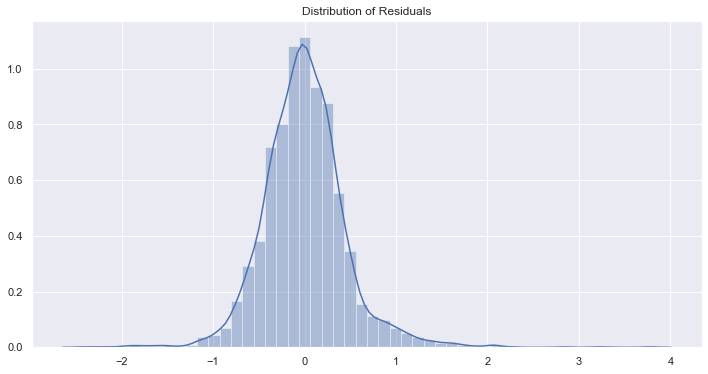


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


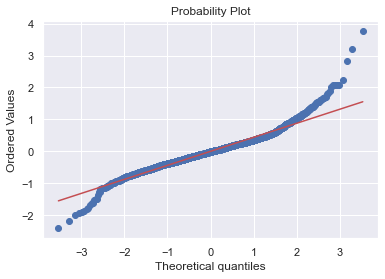


In your dataset you quite fat tails. You have 0.02 potential outliers (67 rows)


{'Satisfied': ['Linearity'],
 'Potentially': ['Multicollinearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Autocorrelation', 'Normality']}

In [184]:
from Assumptions import Assumption_Tester_OLS as atols
atols(X,y).run_all()

### Mulitcollinearity

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [186]:
X1=add_constant(X)
vifs=pd.Series([VIF(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
vifs=pd.Series([VIF(X.values,i) for i in range(X.shape[1])],index=X.columns)
vifs[vifs>10]

Packaging_Box    14.093999
Pieces2          16.548877
dtype: float64

In [134]:
#sns.heatmap(X.corr())

In [187]:
def func(column, X):
    if column:
        X=X.drop(column, axis=1)
    vifs=pd.Series([VIF(X.values,i) for i in range(X.shape[1])],index=X.columns)
    display(vifs[vifs>10])
    return X

In [188]:
X2=X.copy()

In [199]:
["Packaging_Box","Packaging_Box with backing card","Packaging_Other","Theme_Friends","Packaging_Not specified"]

['Packaging_Box',
 'Packaging_Box with backing card',
 'Packaging_Other',
 'Theme_Friends',
 'Packaging_Not specified']

In [197]:
X2=func('Packaging_Not specified',X2)

Series([], dtype: float64)

In [282]:
?sm.OLS

In [198]:
sm.OLS(y,add_constant(X2)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_USD2   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1000.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        12:34:29   Log-Likelihood:                -2207.9
No. Observations:                3346   AIC:                             4448.
Df Residuals:                    3330   BIC:                             4546.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.2128      0.032     -6.634      0.000      -0.276      -0.150
Outliers_Piece                    1.7995      0.273      6.589      0.000       1.264       2.335
Theme_City                        0.1490      0.033      4.464      0.000       0.084       0.214
Theme_Duplo                       1.1268      0.033     33.882      0.000       1.062       1.192
Theme_Ninjago                     0.2087      0.047      4.427      0.000       0.116       0.301
Theme_Other                       0.1795      0.021      8.752      0.000       0.139       0.220
Theme_Star Wars                   0.1045      0.033      3.168      0.002       0.040       0.169
Availability_Promotional         -0.5304      0.064     -8.285      0.000      -0.656      -0.405
Availability_Retail              -0.2851      0.020    -14.042      0.000      -0.325      -0.245
Availability_Retail - limited    -0.3115      0.036     -8.562      0.000      -0.383      -0.240
Availability_Unknown             -1.6455      0.470     -3.504      0.000      -2.566      -0.725
Packaging_Bucket                 -0.6451      0.136     -4.738      0.000      -0.912      -0.378
Packaging_Plastic box             2.5505      0.181     14.119      0.000       2.196       2.905
Packaging_Polybag                -0.4642      0.054     -8.552      0.000      -0.571      -0.358
Packaging_Tub                    -0.3307      0.126     -2.617      0.009      -0.579      -0.083
Pieces2                           0.6784      0.006    105.979      0.000       0.666       0.691
==============================================================================
Omnibus:                      444.928   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2399.256
Skew:                           0.513   Prob(JB):                         0.00
Kurtosis:                       7.019   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Building the equation

In [284]:
df = pd.read_html(sm.OLS(y,add_constant(X2)).fit().summary().tables[1].as_html(),header=0,index_col=0)[0]

In [291]:
df

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.2128,0.032,-6.634,0.000,-0.276,-0.150
Outliers_Piece,1.7995,0.273,6.589,0.000,1.264,2.335
Theme_City,0.1490,0.033,4.464,0.000,0.084,0.214
Theme_Duplo,1.1268,0.033,33.882,0.000,1.062,1.192
Theme_Ninjago,0.2087,0.047,4.427,0.000,0.116,0.301
Theme_Other,0.1795,0.021,8.752,0.000,0.139,0.220
Theme_Star Wars,0.1045,0.033,3.168,0.002,0.040,0.169
Availability_Promotional,-0.5304,0.064,-8.285,0.000,-0.656,-0.405
Availability_Retail,-0.2851,0.020,-14.042,0.000,-0.325,-0.245
Availability_Retail - limited,-0.3115,0.036,-8.562,0.000,-0.383,-0.240


In [290]:
len(df)

16

In [309]:
c=df['coef'].values[0]
lst_coef=[df['coef'].values[i] for i in range(len(df))]

In [327]:
lst_var=["x"+str(i) for i in range(len(df))]

In [314]:
dct_coef={lst_var[i]:lst_coef[i] for i in range(len(df))}
dct_coef

{'x0': -0.2128,
 'x1': 1.7995,
 'x2': 0.149,
 'x3': 1.1268,
 'x4': 0.2087,
 'x5': 0.1795,
 'x6': 0.1045,
 'x7': -0.5304,
 'x8': -0.2851,
 'x9': -0.3115,
 'x10': -1.6455,
 'x11': -0.6451,
 'x12': 2.5505,
 'x13': -0.4642,
 'x14': -0.3307,
 'x15': 0.6784}

In [340]:
str_equation=""

In [341]:
for i in range(len(df)):
    if i ==0:
        str_equation=str_equation+str(lst_coef[i])+" "
    else:
        if lst_coef[i]<0:
            str_equation=str_equation+str(lst_coef[i])+"*"+str(lst_var[i])+" "
        else:
            str_equation=str_equation+"+"+str(lst_coef[i])+"*"+str(lst_var[i])+" "

print("y=",str_equation)

y= -0.2128 +1.7995*x1 +0.149*x2 +1.1268*x3 +0.2087*x4 +0.1795*x5 +0.1045*x6 -0.5304*x7 -0.2851*x8 -0.3115*x9 -1.6455*x10 -0.6451*x11 +2.5505*x12 -0.4642*x13 -0.3307*x14 +0.6784*x15 


In [320]:
for i in range(len(df)):
    if i == 0:
        c= df['coef'].values[i]
    else:
        df['coef'].values[i]

In [289]:
print('y=',a,'*x1',c)

y= 1.7995 *x1 -0.2128


## Function to check all assumptions

Fitting linear regression

R^2: 0.8183334652647039 

Coefficients
-------------------------------------
Intercept: -0.21283932848235354
Outliers_Piece: 1.8
Theme_City: 0.15
Theme_Duplo: 1.13
Theme_Ninjago: 0.21
Theme_Other: 0.18
Theme_Star Wars: 0.1
Availability_Promotional: -0.53
Availability_Retail: -0.29
Availability_Retail - limited: -0.31
Availability_Unknown: -1.65
Packaging_Bucket: -0.65
Packaging_Plastic box: 2.55
Packaging_Polybag: -0.46
Packaging_Tub: -0.33
Pieces2: 0.68

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


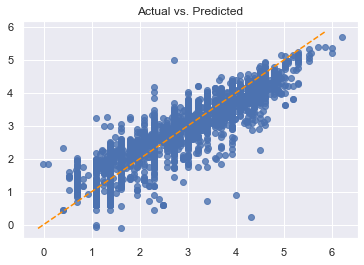

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with Price_USD2


Series([], Name: Price_USD2, dtype: float64)


Parameters that are most likely FOLLOW linearity assumption and their correlation with Price_USD2


Pieces2    0.827721
Name: Price_USD2, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


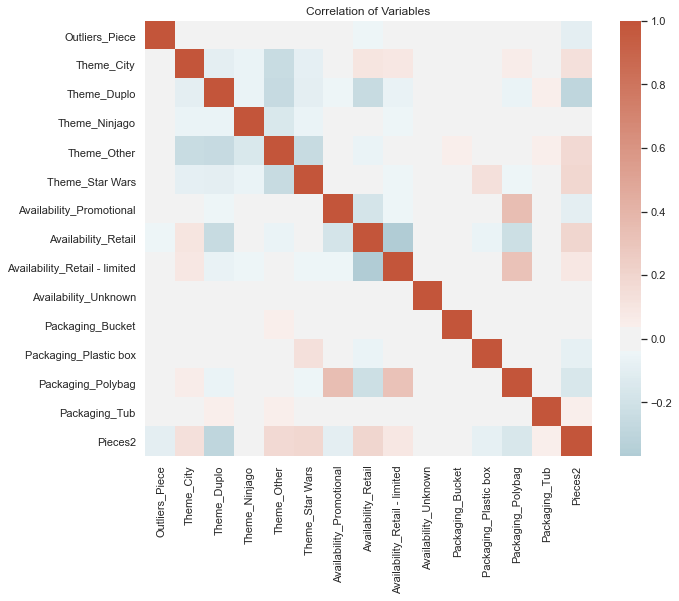

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Pieces2: 6.743126788384994
Availability_Retail: 3.36775692223714
Theme_Other: 2.4790640967776127
Availability_Retail - limited: 1.534434548734396
Theme_Star Wars: 1.4311143834603222
Packaging_Polybag: 1.3651278114503478
Theme_City: 1.325039664285225
Availability_Promotional: 1.2358053074890853
Theme_Duplo: 1.1771606521320832
Theme_Ninjago: 1.1105339309250808
Packaging_Plastic box: 1.0221974264122928
Packaging_Tub: 1.0120056573379823
Packaging_Bucket: 1.009105859903612
Outliers_Piece: 1.0055008818715478
Availability_Unknown: 1.0011458958123394

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive a

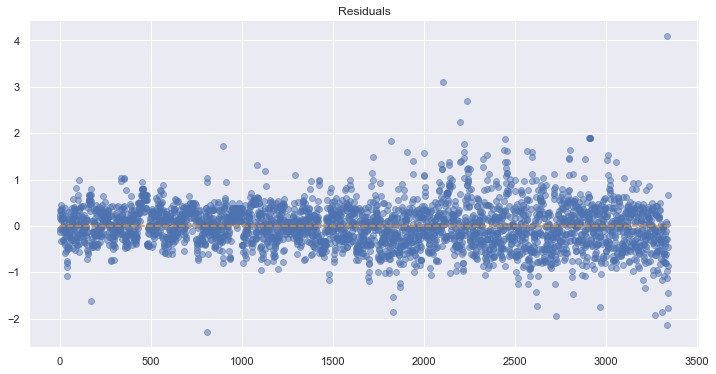

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 467.4246458213363,
 'pvalue for LM': 7.345650439477489e-91,
 'F stats': 36.05930720719597,
 'pvalue for Fstats': 1.9535746679314222e-97}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


C:\Users\Camille\Anaconda3\Anaconda33\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


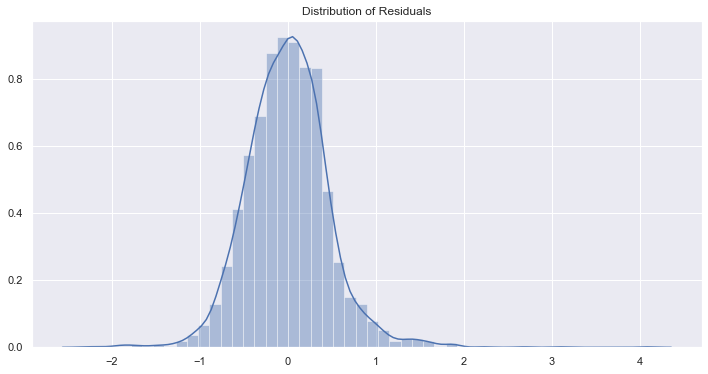


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


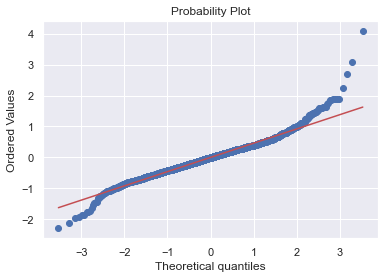


In your dataset you quite fat tails. You have 0.02 potential outliers (66 rows)


{'Satisfied': ['Linearity', 'Multicollinearity'],
 'Potentially': ['Autocorrelation', 'Sub-Normality'],
 'Violated': ['Autocorrelation', 'Normality']}

In [200]:
from Assumptions import Assumption_Tester_OLS as atols
atols(X2,y).run_all()

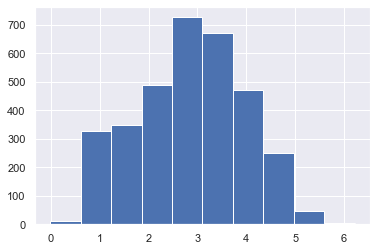

In [281]:
y.hist()

## Manually checking other assumptions

### Autocorrelation

In [240]:
from statsmodels.stats.stattools import durbin_watson

mod=sm.OLS(y,add_constant(X2)).fit()
resid=mod.resid
durbin_watson(resid)

1.1109496025957137

The model has a positive autocorrelation ; which means that "previous" value has influence on the "next" value

### Linearity

In [231]:
X2.nunique()[X2.nunique()>2].index

Index(['Pieces2'], dtype='object')

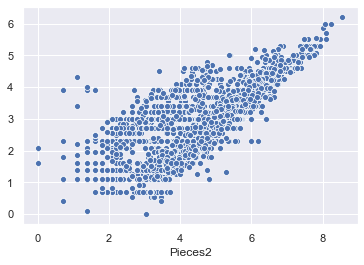

In [238]:
sns.scatterplot(x=X2.Pieces2,y=y.values.ravel())

In [241]:
y_pred=mod.predict(add_constant(X2))

In [242]:
y_pred

0       4.895099
1       4.953127
4       2.368905
5       3.114202
6       2.979998
          ...   
6046    4.136292
6047    1.854380
6050    3.567752
6051    3.055974
6070    2.032029
Length: 3346, dtype: float64

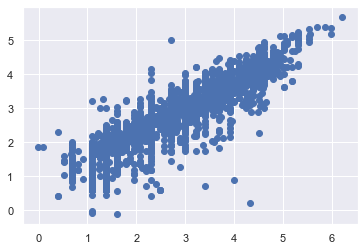

In [243]:
plt.scatter(y, y_pred)

#### Plotting ln predictions

In [358]:
lego=pd.concat([y,y_pred],axis=1)

In [359]:
lego.columns=['Price','Price_predict']

Text(0.5, 8.95999999999998, 'ln(Price)')

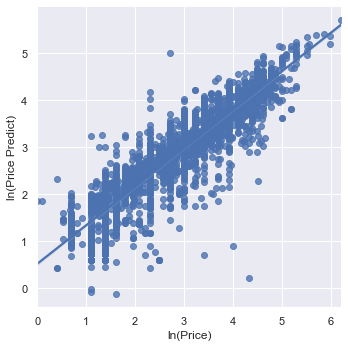

In [372]:
sns.lmplot(x='Price', y='Price_predict', data=lego)
plt.ylabel("ln(Price Predict)")
plt.xlabel("ln(Price)")
#regline.set_color('red')

In [365]:
import numpy as np

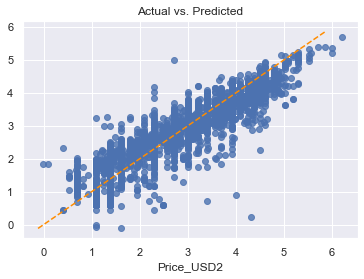

In [367]:
# Plotting the actual vs predicted values
sns.regplot(y,y_pred, fit_reg=False)
        
# Plotting the diagonal line
line_coords = np.arange(min(y.min(),y_pred.min()), max(y.max(),y_pred.max()))
plt.plot(line_coords, line_coords,color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

#### Plotting real predictions

In [351]:
from scipy.special import boxcox, inv_boxcox
exp_y=inv_boxcox(y, 0)
exp_y_pred=inv_boxcox(y_predict, 0)

In [352]:
lego_exp=pd.concat([exp_y,exp_y_pred],axis=1)

In [353]:
lego_exp.columns=['Price','Price_predict']

Text(0.5, 8.95999999999998, 'Price')

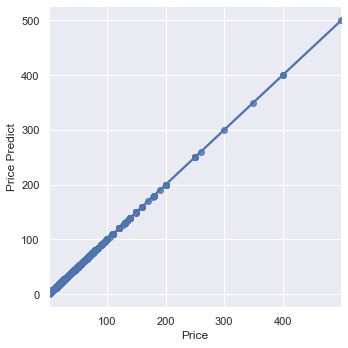

In [356]:
sns.lmplot(x='Price', y='Price_predict', data=lego_exp)
plt.ylabel("Price Predict")
plt.xlabel("Price")

In [338]:
#from statsmodels.stats.diagnostic import linear_harvey_collier

In [340]:
#linear_harvey_collier(mod)

In [341]:
dummies=X2.nunique()[X2.nunique()==2].index

In [342]:
X2[dummies].sum(axis=1).max()

3

In [343]:
X2[dummies].sum(axis=1).min()

0

### Homoskedasticity

In [345]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [346]:
lnames=['Lagrange Multiplier', 'pvalue for LM','F stats','pvalue for Fstats']
{lnames[idx]:het_breuschpagan(resid,X2.iloc[:,2:4])[idx] for idx in range(4)}

{'Lagrange Multiplier': 363.07475932565444,
 'pvalue for LM': 6.026591504293601e-81,
 'F stats': 203.51197184387252,
 'pvalue for Fstats': 3.932556536483628e-84}

### Exogeneity of residuals

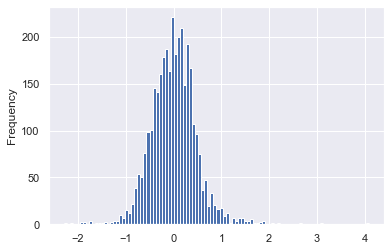

In [347]:
resid.plot.hist(bins=100)

In [348]:
from scipy.stats import kstest

In [349]:
kstest(resid, 'norm') # Goodness of fit, or whether our series follow specific distribution

KstestResult(statistic=0.205108040514409, pvalue=1.0840645959239371e-122)

In [350]:
from scipy.stats import probplot
import pylab

((array([-3.53082163, -3.28896403, -3.15531807, ...,  3.15531807,
          3.28896403,  3.53082163]),
  array([-2.28799516, -2.139657  , -1.94513231, ...,  2.66555628,
          3.0778191 ,  4.08094506])),
 (0.46357909380565826, -7.741792196628719e-15, 0.9830189197961946))

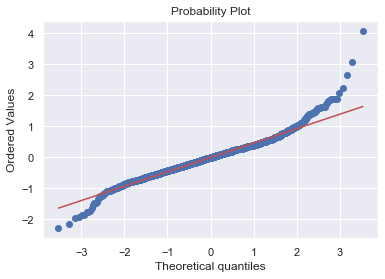

In [354]:
probplot(resid, dist='norm', plot=pylab)

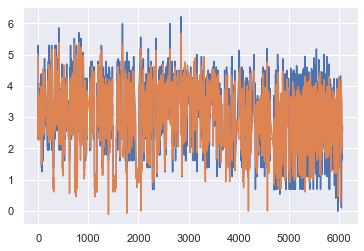

In [355]:
plt.plot(y)
plt.plot(y_pred)

In [356]:
resid.mean()

-7.690733219955687e-15

In [357]:
resid.std()

0.4712070987215703

In [358]:
std_list=[]
for i in range(100):
    std_list.append(resid.sample(1000).std())
sum(std_list)/100

0.4705202837586249

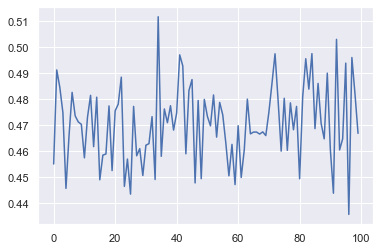

In [359]:
plt.plot(std_list)